In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

SELF_DEFINED_STOP_WORDS = ['thy', 'thou', 'thee', 'sir', 'shall']
df = pd.read_csv("../data/processed/processed.csv")
df.dropna(subset=['PlayerLine'], inplace=True)
print "Load the processed data of the Shakespear playerline data set"
df.head()

Load the processed data of the Shakespear playerline data set


,Dataline,Play,Play_length,PlayerLinenumber,ActSceneLine,ASL_1,ASL_2,ASL_3,Player,PL_length,PL_w_count,PL_w_density,PlayerLine,PL_contain_!,PL_contain_?,PL_#_comma_split,PL_#_stop_words,PL_#_upper_case
0,1,Henry IV,8,NaN,NaN,NaN,NaN,NaN,NaN,5,2,2.500000,ACT I,False,False,1,1,4
1,2,Henry IV,8,NaN,NaN,NaN,NaN,NaN,NaN,28,5,5.600000,SCENE I. London. The palace.,False,False,1,1,8
2,3,Henry IV,8,NaN,NaN,NaN,NaN,NaN,NaN,96,16,6.000000,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ...",False,False,5,4,59
3,4,Henry IV,8,1.0,1.1.1,1.0,1.0,1.0,KING HENRY IV,38,9,4.222222,"So shaken as we are, so wan with care,",False,False,3,5,1
4,5,Henry IV,8,1.0,1.1.2,1.0,1.0,2.0,KING HENRY IV,42,9,4.666667,"Find we a time for frighted peace to pant,",False,False,2,4,1


In [129]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items() if word not in SELF_DEFINED_STOP_WORDS]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_top_n_words(top_words, title=None, rotation=45):
    count = len(top_words)
    fig, ax = plt.subplots(figsize=(16, 8))
    words = [x[0] for x in top_words]
    ax.bar(range(count), [x[1] for x in top_words])
    ax.set_xticks(range(count))
    ax.set_xticklabels(words, rotation='vertical')
    chart_title = title or 'Top {} words in title (excluding stop words)'.format(count)
    ax.set_title(chart_title)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=rotation)
    plt.show()

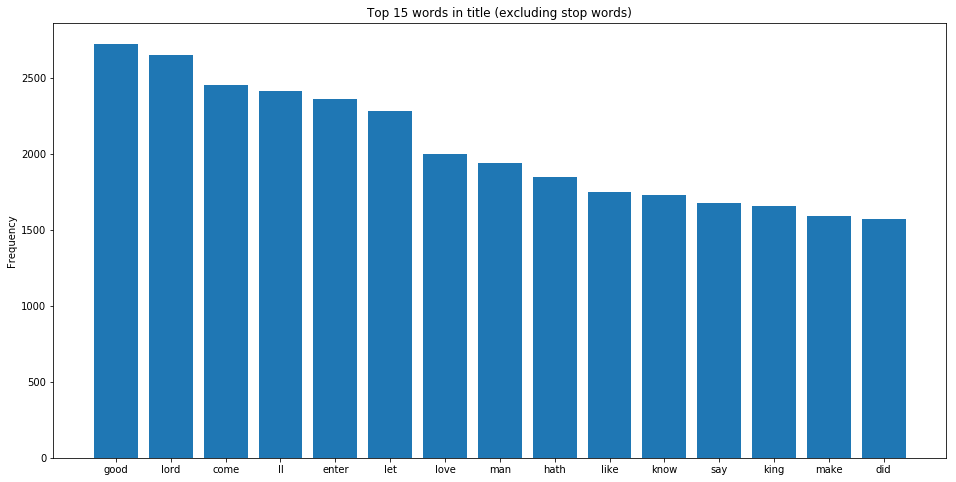

In [132]:
titles = df['PlayerLine'].dropna()
top_N_words = get_top_n_words(titles, n=15)
plot_top_n_words(top_N_words, rotation=0)

number of playerlines by player


<Figure size 1152x504 with 0 Axes>

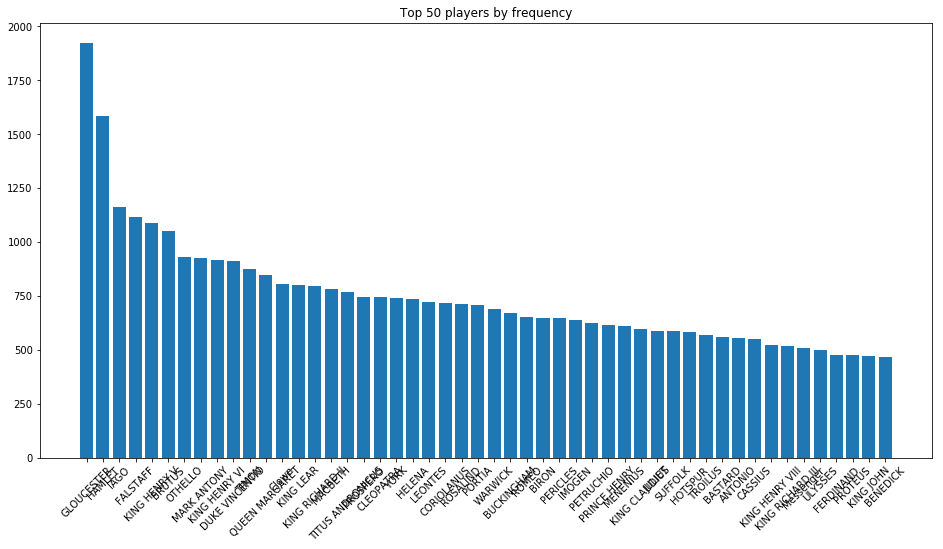

In [19]:
print "number of playerlines by player"
plt.figure(figsize=(16, 7))
lines_by_player = df['Player'].value_counts(sort=True)[:50]
lines_by_player
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(lines_by_player.index.values, lines_by_player.values)
#ax = sns.lineplot(x=lines_by_player.index.values, y=lines_by_player.values)
plt.title('Top 50 players by frequency')
plt.xticks(rotation=45)
plt.show()

number of playerlines by play


<Figure size 1152x504 with 0 Axes>

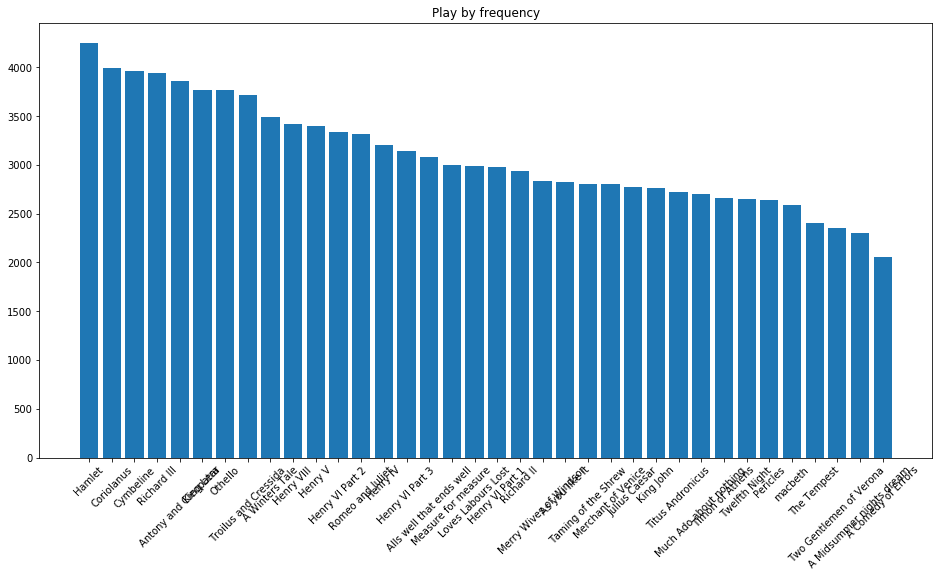

In [21]:
print "number of playerlines by play"
plt.figure(figsize=(16, 7))
lines_by_play = df['Play'].value_counts(sort=True)
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(lines_by_play.index.values, lines_by_play.values)
plt.title('Play by frequency')
plt.xticks(rotation=45)
plt.show()

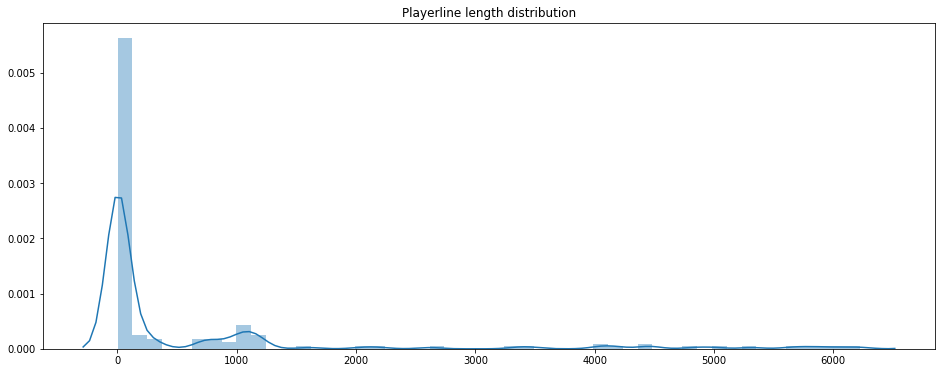

In [201]:
pl_length = df['PL_length'].value_counts(sort=True)
plt.figure(figsize=(16, 6))
plt.title("Playerline length distribution")
sns.distplot(pl_length.values);


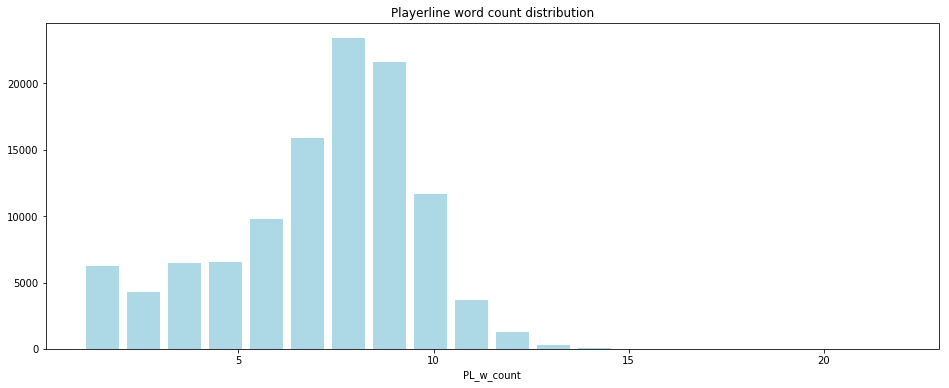

In [237]:
pl_word_count = df['PL_w_count'].value_counts(sort=True)
pl_word_count[:20].index
pl_word_count_top_20 = df[df['PL_w_count'].isin(pl_word_count[:20].index)]

plt.figure(figsize=(16, 6))
plt.title("Playerline word count distribution")
sns.distplot(pl_word_count_top_20['PL_w_count'], bins=20, kde=False, hist_kws={"rwidth":0.8,"alpha": 1, "color": "lightblue"});


Text(0.5,1,'Player line word density distribution')

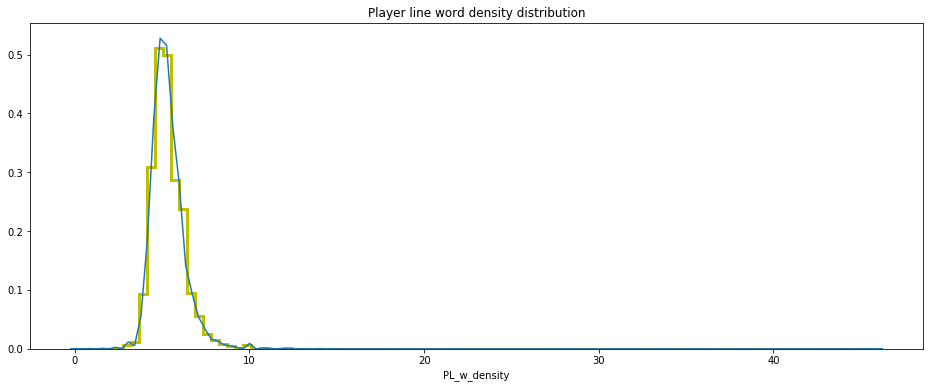

In [3]:
binwidth = 0.05
plt.figure(figsize=(16, 6))
#plt.hist(df['PL_w_density'], bins = int(10/binwidth), color = 'lightblue', edgecolor = 'black', log=True)
sns.distplot(df['PL_w_density'], bins=100, kde=True, rug=False,
             hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "y"})
plt.title("Player line word density distribution")

In [126]:
def plot_wordcloud(words, title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="white", 
                      stopwords=list(STOPWORDS) + SELF_DEFINED_STOP_WORDS).generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off")
    plt.title(title, fontsize=60)
    plt.show()

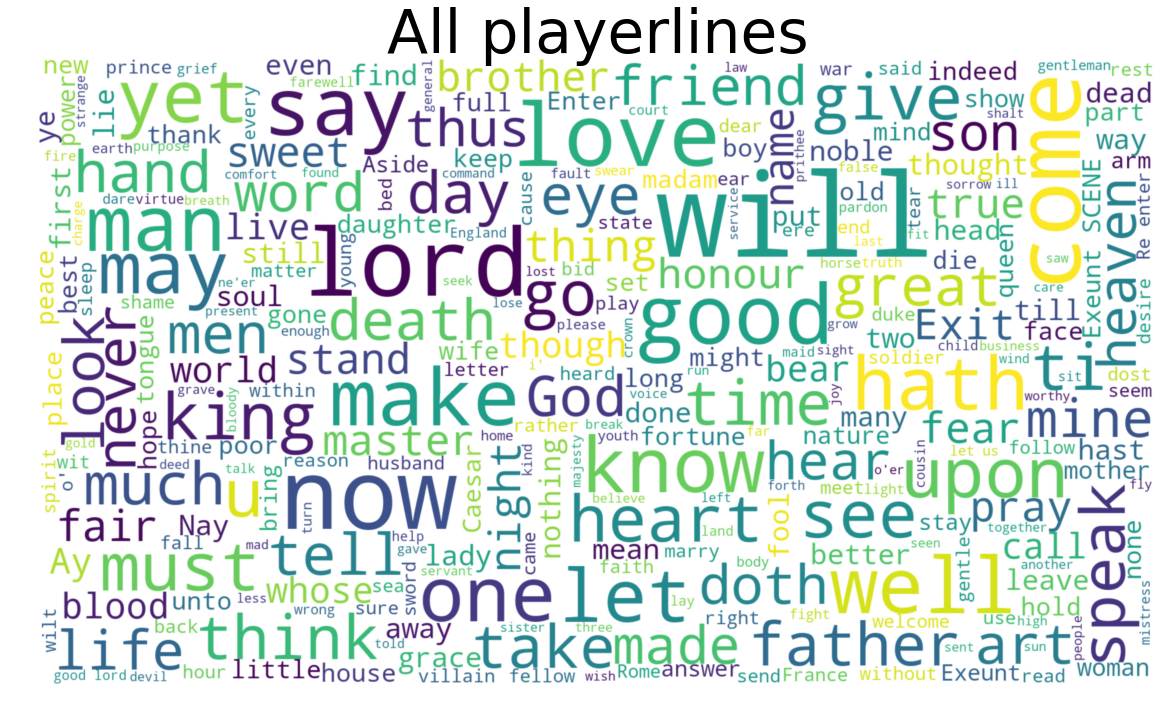

In [127]:
all_text = " ".join([str(v) for v in df['PlayerLine']])
plot_wordcloud(all_text, "All playerlines")

What is Hamlet talking about?
[(u'lord', 222), (u'hamlet', 110), (u'good', 109), (u'come', 106), (u'let', 105), (u'king', 96), (u'like', 85), (u'know', 77), (u'll', 76), (u'tis', 73), (u'enter', 72)]


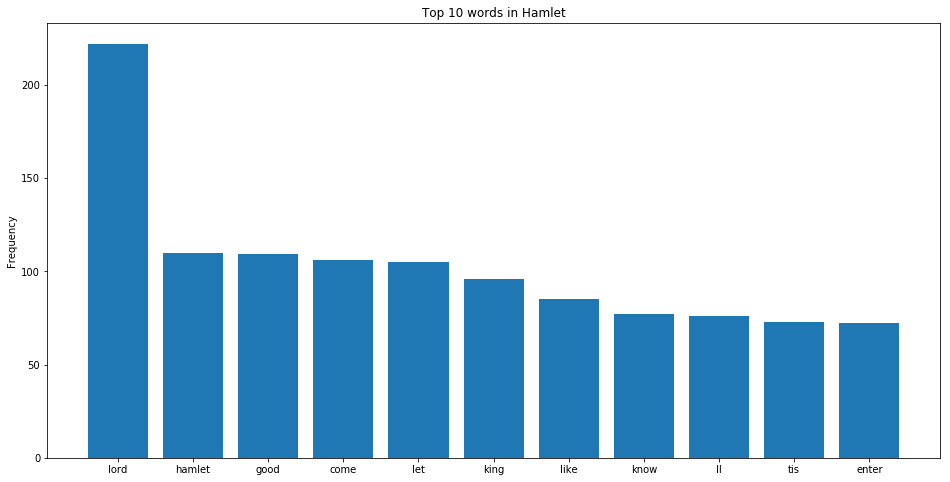

In [134]:
print "What is Hamlet talking about?"
df_hamlet = df[df['Play'] == 'Hamlet']
top_11_words = get_top_n_words(df_hamlet.PlayerLine, n=11)
print top_11_words
plot_top_n_words(top_11_words, title="Top 10 words in Hamlet", rotation=0)

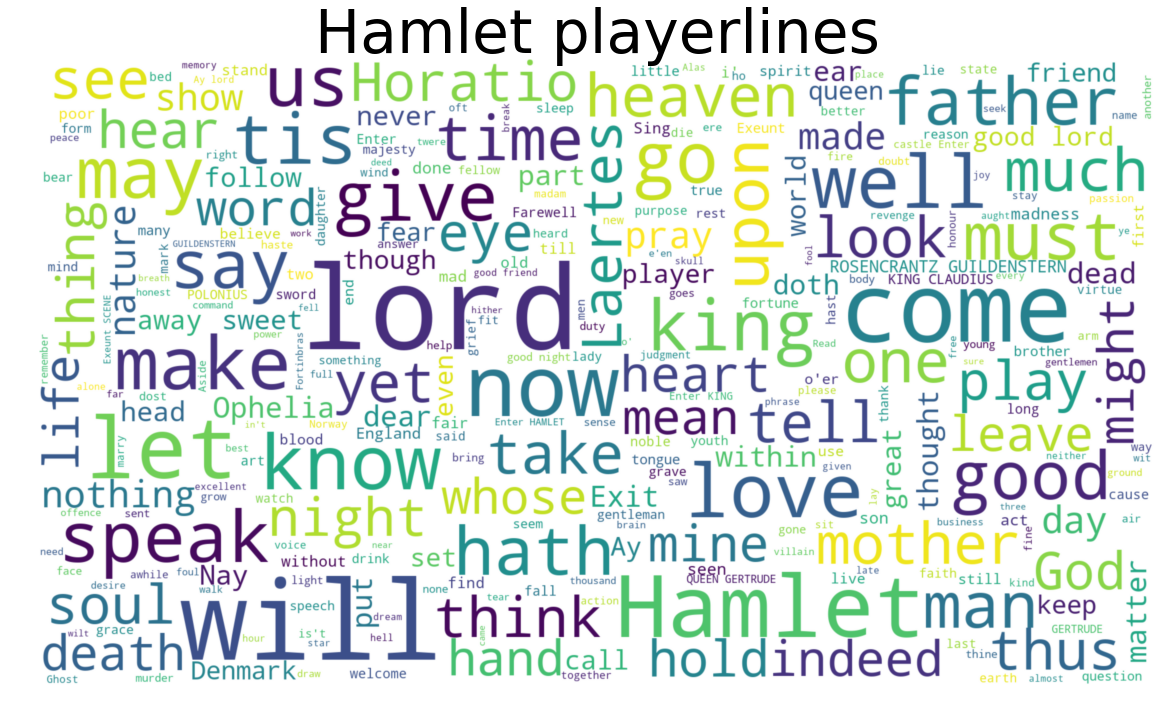

In [135]:
hamlet_text = " ".join([str(v) for v in df_hamlet['PlayerLine']])
plot_wordcloud(hamlet_text, "Hamlet playerlines")

Text(0.5,1,"mentions of 'tragedy/misery' in all plays")

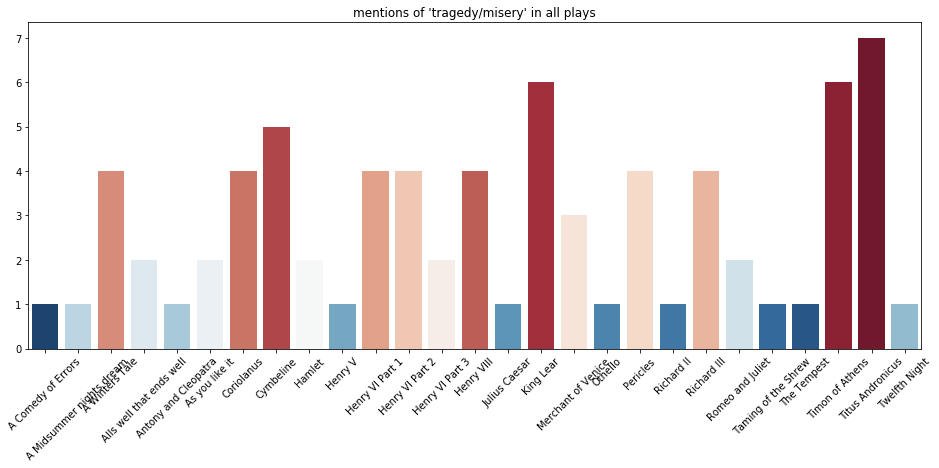

In [197]:
df_tragedy = df[df['PlayerLine'].str.contains("miseries|misery|tragedy|tragedies")]
plays = df_tragedy['Play'].value_counts(sort=False).sort_index()
plt.figure(figsize=(16, 6))
rank = plays.argsort().argsort()
pal = sns.color_palette("RdBu", len(rank))
pal
sns.barplot(plays.index.values, plays.values, palette=np.array(pal[::-1])[rank]);
plt.xticks(rotation=45)
plt.title("mentions of 'tragedy/misery' in all plays")